In [ ]:
%cd /content/drive/MyDrive/data for pandas
!ls

/content/drive/MyDrive/data for pandas
data_linear.csv  data_square.csv      housing.data    winequality.names
dataset.csv	 googleplaystore.csv  PriceStock.csv  winequality-white.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
data = pd.read_csv('PriceStock.csv')
data.columns.values[1] = 'Close'
print(data)

            Date      Close     Volume       Open       High        Low
0     02/28/2020    $273.36  106721200    $257.26    $278.41    $256.37
1     02/27/2020    $273.52   80151380     $281.1       $286    $272.96
2     02/26/2020    $292.65   49678430    $286.53    $297.88     $286.5
3     02/25/2020    $288.08   57668360    $300.95    $302.53    $286.13
4     02/24/2020    $298.18   55548830    $297.26    $304.18    $289.23
...          ...        ...        ...        ...        ...        ...
2513  03/05/2010   $31.2786  224647427   $30.7057   $31.3857   $30.6614
2514  03/04/2010   $30.1014   89591907   $29.8971   $30.1314   $29.8043
2515  03/03/2010   $29.9043   92846488   $29.8486   $29.9814   $29.7057
2516  03/02/2010   $29.8357  141486282     $29.99   $30.1186   $29.6771
2517  03/01/2010   $29.8557  137312041   $29.3928   $29.9286     $29.35

[2518 rows x 6 columns]


In [ ]:
data.dtypes

Date       object
Close      object
 Volume     int64
 Open      object
 High      object
 Low       object
dtype: object

In [ ]:
data[data.columns[1]] = data[data.columns[1]].replace('[\$,]', '', regex = True).astype(float)
data[data.columns[3:]] = data[data.columns[3:]].replace('[\$,]', '', regex = True).astype(float)
data.dtypes

Date        object
Close      float64
 Volume      int64
 Open      float64
 High      float64
 Low       float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2518 non-null   object 
 1   Close    2518 non-null   float64
 2    Volume  2518 non-null   int64  
 3    Open    2518 non-null   float64
 4    High    2518 non-null   float64
 5    Low     2518 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.2+ KB


In [ ]:
data.describe()

,Close,Volume,Open,High,Low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,114.769522,7.258009e+07,114.728443,115.766415,113.690582
std,60.662405,5.663113e+07,60.546893,61.134456,60.085105
min,29.835700,1.136205e+07,29.392800,29.928600,28.464300
25%,66.822475,3.053026e+07,66.877150,67.475300,66.372950
50%,101.090000,5.295469e+07,101.115000,102.085000,100.350000
75%,154.630000,9.861006e+07,154.610000,155.735000,153.325000
max,327.200000,4.624423e+08,324.740000,327.850000,323.350000


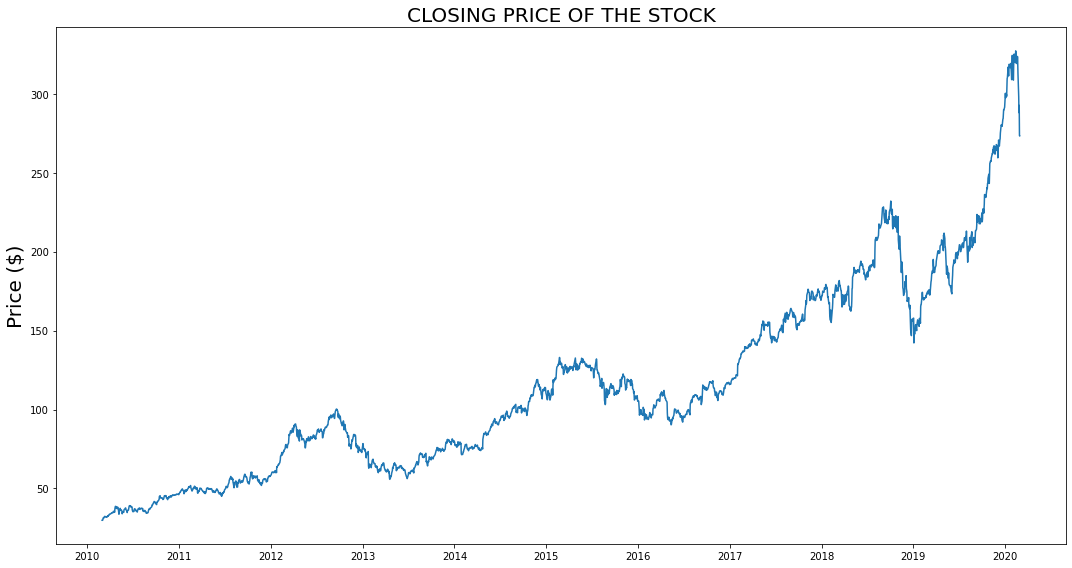

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(15,8))
plt.plot(data['Date'],data['Close'])
plt.ylabel('Price ($)', fontsize = 20)
plt.title('CLOSING PRICE OF THE STOCK', fontsize = 20)
plt.tight_layout()
plt.show()

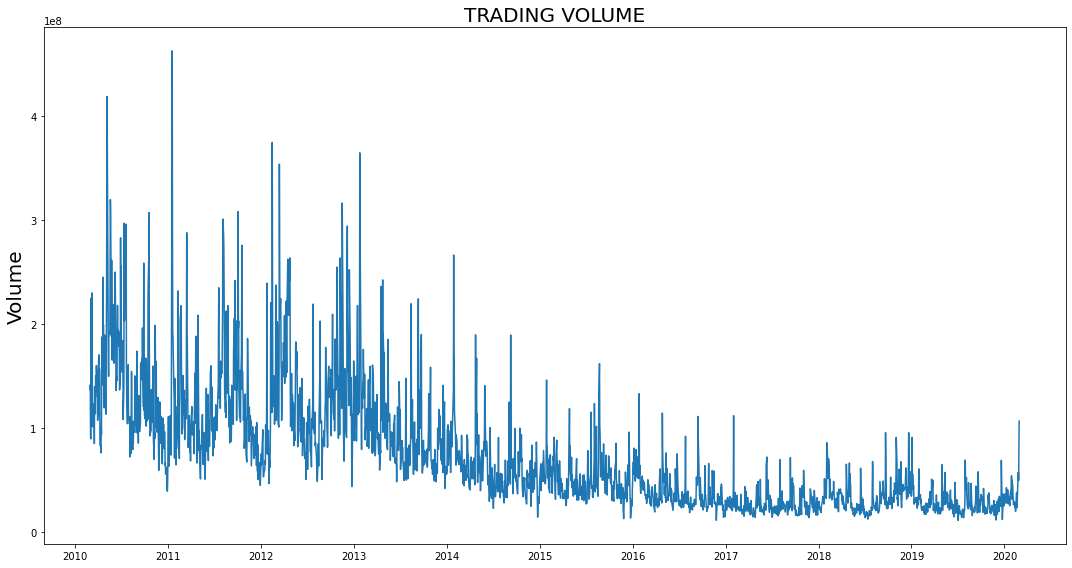

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data['Date'], data[' Volume'])
plt.title('TRADING VOLUME', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.tight_layout()
plt.show()

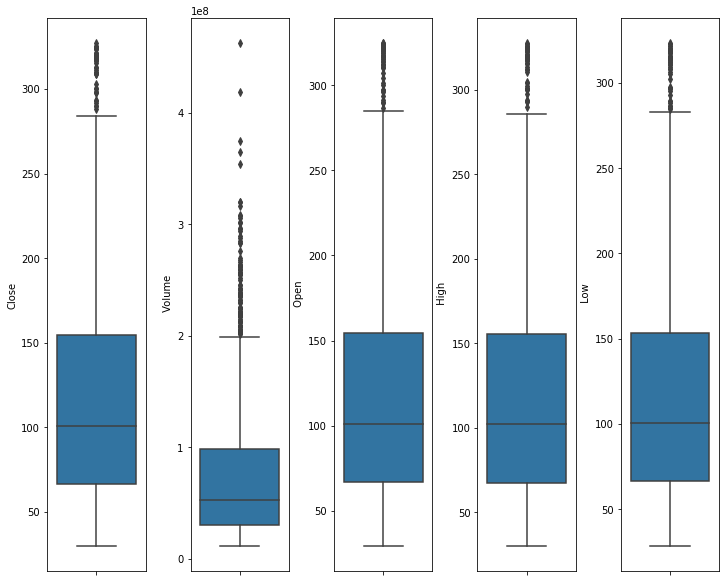

In [ ]:
new_data = data[data.columns[1:]]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 8))
index = 0
axs = axs.flatten()
for k,v in new_data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k,v in new_data.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print('Column %s outliers = %.2f%%' % (k,perc))

Column Close outliers = 1.67%
Column  Volume outliers = 3.81%
Column  Open outliers = 1.63%
Column  High outliers = 1.67%
Column  Low outliers = 1.67%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[]

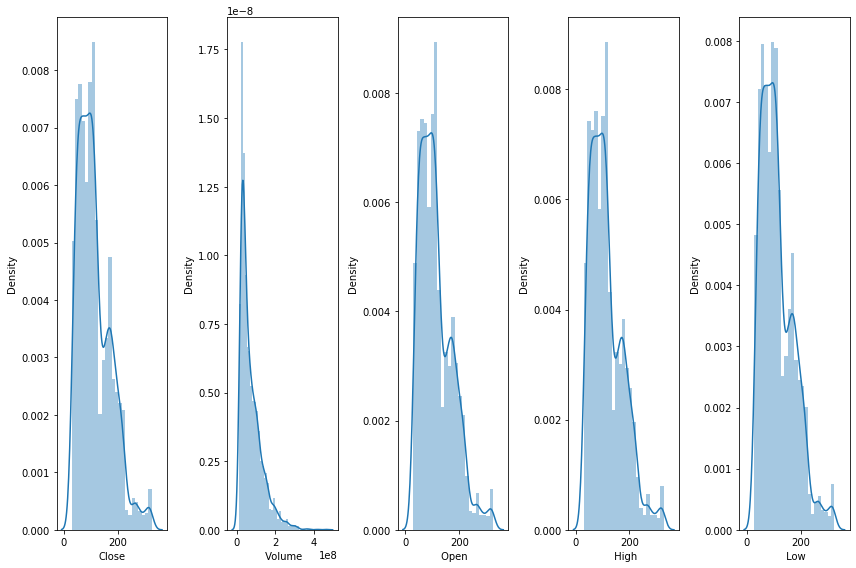

In [ ]:
fig, axs = plt.subplots(ncols = 5, nrows = 1, figsize=(12,8))
index = 0
axs = axs.flatten()
for k,v in new_data.items():
  sns.distplot(v, ax = axs[index])
  index += 1
plt.tight_layout()
plt.plot()

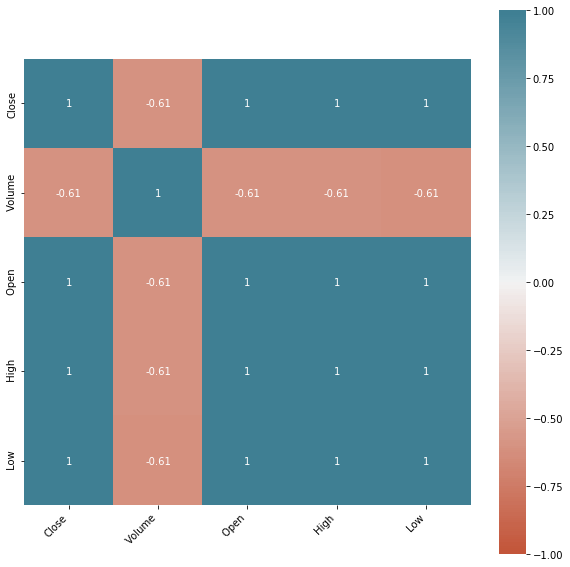

In [ ]:
cor = new_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    cor,
    vmin=-1, vmax=1, center=0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment='right'
);

In [ ]:
close_value = data.filter(['Close'])
dataset = close_value.values
training_data = int(np.ceil(len(close_value)* .95))

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_value)
scaled_data

array([[8.18942624e-01],
       [8.19480684e-01],
       [8.83812549e-01],
       ...,
       [2.30693463e-04],
       [0.00000000e+00],
       [6.72575693e-05]])

In [ ]:
data_train = scaled_data[0:int(training_data),:]
x_train = []
y_train = []
for i in range(45, len(data_train)): 
  x_train.append(data_train[i-45:i, 0])
  y_train.append(data_train[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
147/147 [==============================] - 13s 63ms/step - loss: 0.0026
Epoch 2/10
147/147 [==============================] - 9s 63ms/step - loss: 2.2831e-04
Epoch 3/10
147/147 [==============================] - 10s 71ms/step - loss: 1.8999e-04
Epoch 4/10
147/147 [==============================] - 11s 76ms/step - loss: 2.1722e-04
Epoch 5/10
147/147 [==============================] - 10s 71ms/step - loss: 1.7867e-04
Epoch 6/10
147/147 [==============================] - 9s 64ms/step - loss: 1.8202e-04
Epoch 7/10
147/147 [==============================] - 9s 64ms/step - loss: 2.0787e-04
Epoch 8/10
147/147 [==============================] - 9s 64ms/step - loss: 1.5812e-04
Epoch 9/10
147/147 [==============================] - 9s 64ms/step - loss: 1.4267e-04
Epoch 10/10
147/147 [==============================] - 10s 65ms/step - loss: 1.6746e-04


In [ ]:
test_data = scaled_data[training_data-45:,:]
x_test = []
y_test = dataset[training_data:,:]
predicts = []
x_test.append(test_data[0:45,0])
for i in range(45, len(test_data)):
  x_test_np = np.array([x_test[-1]])
  x_test_np = np.reshape(x_test_np, (x_test_np.shape[0], x_test_np.shape[1], 1))
  predict = model.predict(x_test_np)[0]
  predicts.append(predict)
  temp = np.append(x_test[-1][1:], predict)
  x_test = np.concatenate((x_test, np.array([temp])))
predicts = scaler.inverse_transform(predicts)
rmse = np.sqrt(np.mean(((predicts - y_test)**2)))
rmse

8.558299319623977

In [ ]:
mape = np.mean(np.abs((y_test - predicts) / y_test)) * 100
mape

19.711558149505265

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


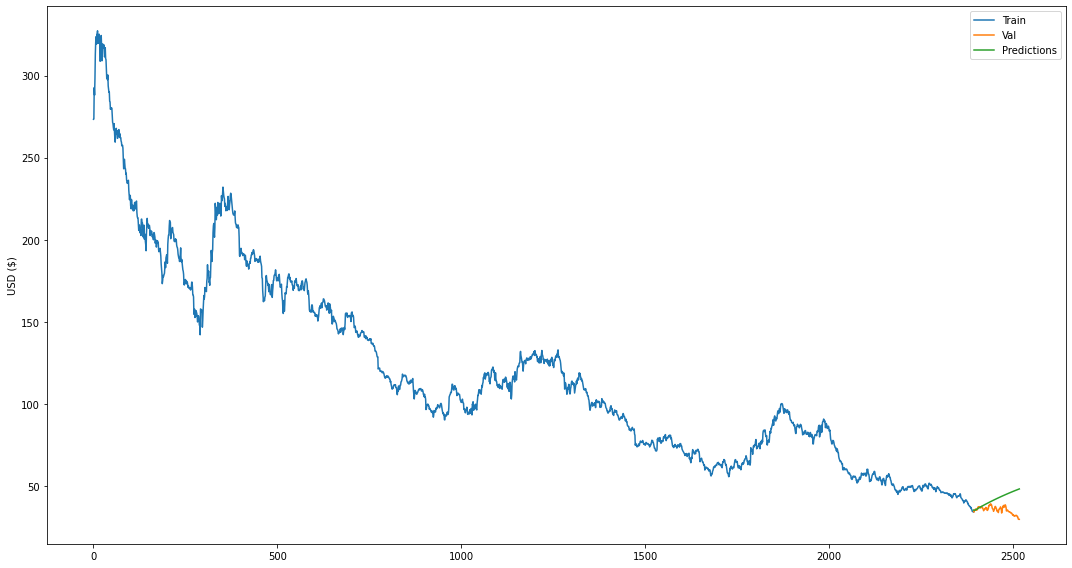

In [ ]:
train = close_value[:training_data]
valid = close_value[training_data:]
valid['Predicts'] = predicts
plt.figure(figsize=(15,8))
plt.ylabel('USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predicts']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.tight_layout()
plt.show()

In [163]:
valid

,Close,Predicts
2393,34.6986,35.498338
2394,34.2757,35.346518
2395,35.1143,35.321704
2396,35.6628,35.369825
2397,35.6971,35.459520
...,...,...
2513,31.2786,48.015200
2514,30.1014,48.102506
2515,29.9043,48.189505
2516,29.8357,48.276204
